## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-21-Basic-Scheduling-Three-way

## pyschedule - Resource-constrained Scheduling in Python

![](https://github.com/timnon/pyschedule/blob/master/pics/gantt.png)

pyschedule is the easiest way to match tasks with resources. 

In [1]:
#!pip install pyschedule

In [2]:
# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
import os

In [3]:
S = Scenario('Angus_Jock_Zhaan_Backyard',horizon=10)

# Create three resources
Angus, Jock, Zhaan = S.Resource('Angus'), S.Resource('Jock'), S.Resource('Zhaan')

# Create three tasks with lengths 1,2 and 3
mail, hole, mud = S.Task('steal_mail',1), S.Task('dig_hole',3), S.Task('play_mud',1)
food1, food2, food3 = S.Task('eat_food_1',2), S.Task('eat_food_2',2), S.Task('eat_food_3',2)
# Assign tasks to resources, either Angus, Jock or Zhaan,
# the %-operator connects tasks and resource
mail += Jock|Zhaan
mud += Zhaan
hole += Angus

food1 += Angus
food2 += Jock|Zhaan
food3 += Jock|Zhaan

# Solve and print solution
S.use_makespan_objective()
solvers.mip.solve(S,msg=1)

# Print the solution
print(S.solution())

INFO: execution time for solving mip (sec) = 0.0959923267364502
INFO: objective = 5.0
[(eat_food_1, Angus, 0, 2), (eat_food_2, Zhaan, 0, 2), (steal_mail, Jock, 0, 1), (eat_food_3, Jock, 1, 3), (dig_hole, Angus, 2, 5), (play_mud, Zhaan, 4, 5), (MakeSpan, Angus, 5, 6)]


In example we use a makespan objective which means that we want to minimize the completion time of the last task. 

Hence, Jock should stealing mail from 0 to 1 and then do the eating of the food from 1 to 3, whereas Angus will only do the digging of holes from 0 to 3. 

This will ensure that both are done after three hours. 

This table representation is a little hard to read, we can visualize the plan using matplotlib:

In [4]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 10'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 10


In [5]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [6]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 10','Chapter-010-21-Basic-Scheduling-Three-way-01.jpg'])
print(imagename)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 10\Chapter-010-21-Basic-Scheduling-Three-way-01.jpg


In [7]:
plotters.matplotlib.plot(S,fig_size=(20,3),img_filename=imagename)

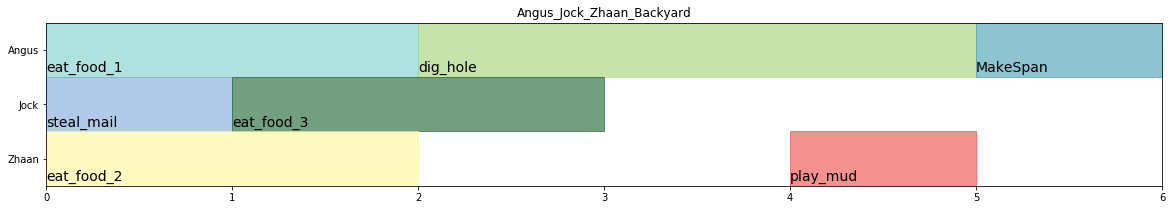

In [8]:
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(20,3))

## Done

In [9]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 17:37:16.624907
